# Forecasting the sales of a furniture store

### Abstract:
One of the most important tasks for any retail store company is to analyze the performance of its stores. The main challenge faced by any retail store is predicting in advance the sales and inventory required at each store to avoid overstocking and
under-stocking. This helps the business to provide the best customer experience and avoid getting into losses, thus ensuring the store is sustainable for operation.
### Problem Statement:
Read the superstore data and forecast about the sales of furniture for the next year.
### Dataset Information:
The data set contains information about products, sales, profits, and so on that you can use to identify key areas for improvement within the furniture company.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings(action='ignore')

### Read the Dataset

In [3]:
df = pd.read_csv('super_store.csv',encoding = 'latin1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### Exploratory Data Analysis

In [4]:
df.shape

(2121, 21)

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [7]:
df1 = df[['Order Date','Sales']]
df1.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [8]:
df1['Order Date'].value_counts()

9/5/2016      10
12/1/2016      9
11/19/2017     9
10/30/2017     9
12/25/2016     9
              ..
10/30/2015     1
7/9/2015       1
9/9/2016       1
6/22/2015      1
1/21/2014      1
Name: Order Date, Length: 889, dtype: int64

In [9]:
df1 = df1.groupby(['Order Date'])['Sales'].mean().reset_index()
df1

,Order Date,Sales
0,1/1/2017,243.872500
1,1/10/2014,51.940000
2,1/10/2015,1018.104000
3,1/10/2016,52.385000
4,1/11/2014,9.940000
...,...,...
884,9/8/2016,562.496933
885,9/8/2017,333.413000
886,9/9/2014,288.008000
887,9/9/2016,15.008000


In [10]:
r = df1['Order Date'].value_counts()
r[r>1]

Series([], Name: Order Date, dtype: int64)

In [11]:
df1.head()

,Order Date,Sales
0,1/1/2017,243.8725
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,52.3850
4,1/11/2014,9.9400


In [12]:
df1.dtypes

Order Date     object
Sales         float64
dtype: object

In [13]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1.sort_values('Order Date',inplace=True)
df1.head()

,Order Date,Sales
49,2014-01-06,2573.8200
50,2014-01-07,76.7280
1,2014-01-10,51.9400
4,2014-01-11,9.9400
7,2014-01-13,439.9695


In [14]:
df1.set_index('Order Date',inplace=True)
df1.head()

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,439.9695


In [15]:
df1.head(20)

,Sales
Order Date,
2014-01-06,2573.820000
2014-01-07,76.728000
2014-01-10,51.940000
2014-01-11,9.940000
2014-01-13,439.969500
2014-01-14,61.960000
2014-01-16,127.104000
2014-01-19,181.470000
2014-01-20,282.702000


In [16]:
df2 = df1.copy()

In [17]:
df1.head()

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,439.9695


In [18]:
df3 = df2['Sales'].resample('MS').sum()
df3

Order Date
2014-01-01     4526.947500
2014-02-01      739.624667
2014-03-01     7613.739500
2014-04-01     3743.443333
2014-05-01     4390.429833
2014-06-01     7804.209600
2014-07-01     5893.565600
2014-08-01     3977.143833
2014-09-01     8573.639967
2014-10-01     6413.311750
2014-11-01     7209.694250
2014-12-01     8653.071493
2015-01-01     9824.892600
2015-02-01     1789.218667
2015-03-01     8392.004883
2015-04-01     4598.329217
2015-05-01     3672.571875
2015-06-01     5429.513667
2015-07-01     7260.098667
2015-08-01     5252.319200
2015-09-01     5829.524360
2015-10-01     5831.375833
2015-11-01     9307.929293
2015-12-01     7772.598340
2016-01-01     5683.541667
2016-02-01     2250.345167
2016-03-01     7512.678917
2016-04-01     8650.480100
2016-05-01     6403.183167
2016-06-01     6435.529633
2016-07-01     5252.366833
2016-08-01     5401.181633
2016-09-01     9514.026733
2016-10-01     4029.486267
2016-11-01     9443.653060
2016-12-01    12909.263754
2017-01-01     38

In [19]:
df4 = df2['Sales'].resample('MS').mean()
df4

Order Date
2014-01-01    348.226731
2014-02-01    147.924933
2014-03-01    447.867029
2014-04-01    267.388810
2014-05-01    274.401865
2014-06-01    410.747874
2014-07-01    327.420311
2014-08-01    248.571490
2014-09-01    357.234999
2014-10-01    400.831984
2014-11-01    327.713375
2014-12-01    432.653575
2015-01-01    818.741050
2015-02-01    298.203111
2015-03-01    524.500305
2015-04-01    353.717632
2015-05-01    244.838125
2015-06-01    301.639648
2015-07-01    382.110456
2015-08-01    328.269950
2015-09-01    306.817072
2015-10-01    306.914518
2015-11-01    387.830387
2015-12-01    353.299925
2016-01-01    378.902778
2016-02-01    204.576833
2016-03-01    357.746615
2016-04-01    455.288426
2016-05-01    291.053780
2016-06-01    402.220602
2016-07-01    308.962755
2016-08-01    317.716567
2016-09-01    396.417781
2016-10-01    212.078225
2016-11-01    377.746122
2016-12-01    496.510144
2017-01-01    253.536494
2017-02-01    227.388339
2017-03-01    235.470753
2017-04-01    

### Checking if Data is Stationary

#### KPSS Test

In [20]:
def kpss_test(data):
    res = kpss(data)
    print('KPSS-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]< 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [21]:
kpss_test(df3)

KPSS-Test_Stat 0.4690690165273382
p-val 0.04863310438573465
Ho accepted - Data is non-stationary


In [22]:
kpss_test(df4)

KPSS-Test_Stat 0.19013785366685576
p-val 0.1
H1 accepted - Data is stationary


#### ADF Test

In [23]:
def adf_test(data):
    res = adfuller(data)
#     print('res',res)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [24]:
adf_test(df3)

ADF-Test_Stat -5.884858543508163
p-val 3.0182932845617726e-07
H1 accepted - Data is stationary


In [25]:
adf_test(df4)

ADF-Test_Stat -7.150160517798492
p-val 3.1563843600195753e-10
H1 accepted - Data is stationary


### Inference
- Data is Stationary using both tests for df4

In [26]:
print(df4.index.min())
print(df4.index.max())

2014-01-01 00:00:00
2017-12-01 00:00:00


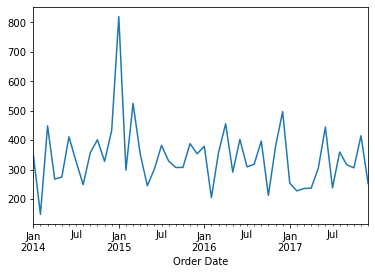

In [27]:
df4.plot()
plt.show()

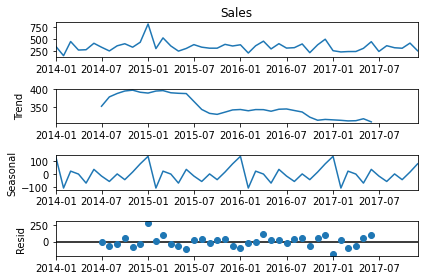

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df4, model='additive')
result.plot()
plt.show()

In [29]:
df4.shape

(48,)

In [30]:
df4.head()

Order Date
2014-01-01    348.226731
2014-02-01    147.924933
2014-03-01    447.867029
2014-04-01    267.388810
2014-05-01    274.401865
Freq: MS, Name: Sales, dtype: float64

### AutoCorrelation (ACF) and Partial Autorrelation (PACF)

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

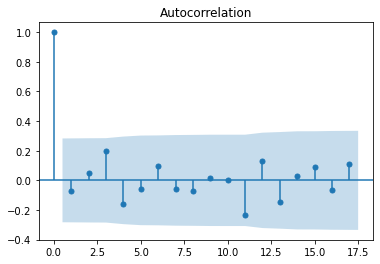

In [32]:
plot_acf(df4)
plt.show()
# q = 1

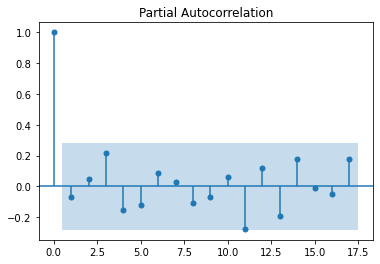

In [33]:
plot_pacf(df4)
plt.show()
# p = 1

### Inference
Best case scenario -> (p,d,q) = (1,0,1) 

### Data Split

In [34]:
train = df4[:42]
test = df4[42:]
print('Train_tail',train.tail())
print('Test_tail',test.head(6))

Train_tail Order Date
2017-02-01    227.388339
2017-03-01    235.470753
2017-04-01    236.644792
2017-05-01    303.874168
2017-06-01    444.116538
Freq: MS, Name: Sales, dtype: float64
Test_tail Order Date
2017-07-01    237.652560
2017-08-01    359.277718
2017-09-01    316.174756
2017-10-01    305.537999
2017-11-01    414.486239
2017-12-01    252.144566
Freq: MS, Name: Sales, dtype: float64


In [35]:
print(train.shape)
print(test.shape)

(42,)
(6,)


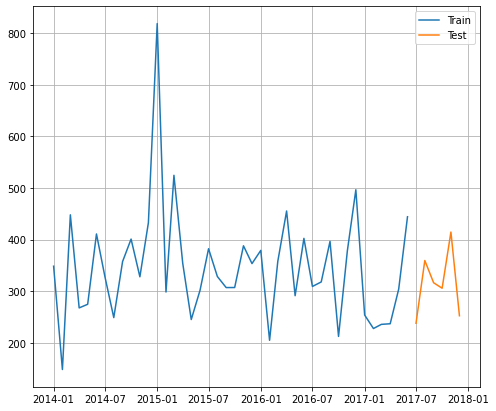

In [36]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [38]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
#     mae = mean_squared_error(test,pred)
    mape = mean_absolute_percentage_error(test,pred)
    return mse,rmse,mape

## Model Building

### AR Model (1,0,0)

In [39]:
m1 = ARIMA(train,order=(1,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -256.908
Date:                Tue, 02 Aug 2022   AIC                            519.815
Time:                        21:31:28   BIC                            525.028
Sample:                    01-01-2014   HQIC                           521.726
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.1518     21.365     16.155      0.000     303.277     387.027
ar.L1         -0.0324      0.296     -0.109      0.913      -0.613       0.548
sigma2      1.204e+04   2208.548      5.450      0.0

In [40]:
fcast_m1 = ar_m1.forecast(6)
fcast_m1

2017-07-01    341.943850
2017-08-01    345.255763
2017-09-01    345.148408
2017-10-01    345.151888
2017-11-01    345.151775
2017-12-01    345.151779
Freq: MS, Name: predicted_mean, dtype: float64

In [41]:
test

Order Date
2017-07-01    237.652560
2017-08-01    359.277718
2017-09-01    316.174756
2017-10-01    305.537999
2017-11-01    414.486239
2017-12-01    252.144566
Freq: MS, Name: Sales, dtype: float64

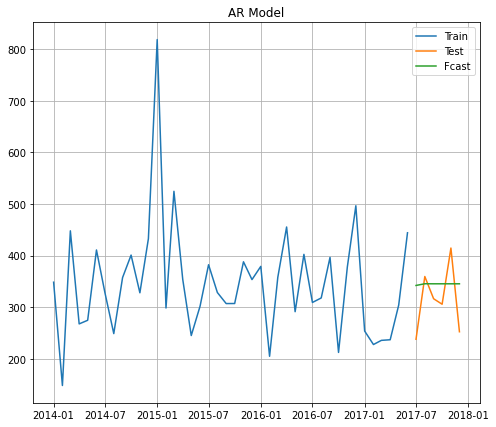

In [42]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Fcast')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [43]:
aic_m1 = ar_m1.aic
print('AIC',aic_m1)

AIC 519.8151070963663


In [44]:
mse_m1,rmse_m1,mape_m1  = test_metrics(test,fcast_m1)

In [45]:
m1_res = pd.DataFrame({'Model':'AR (1,0,0)','MSE':mse_m1,'RMSE':rmse_m1,
                       'MAPE':mape_m1,'AIC':aic_m1},index=[0])
m1_res

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107


### MA Model (0,0,1)

In [46]:
m2 = ARIMA(train,order=(0,0,1))
ar_m2 = m2.fit()
print(ar_m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -256.909
Date:                Tue, 02 Aug 2022   AIC                            519.818
Time:                        21:31:28   BIC                            525.031
Sample:                    01-01-2014   HQIC                           521.729
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.1554     21.346     16.169      0.000     303.317     386.994
ma.L1         -0.0301      0.302     -0.100      0.921      -0.623       0.562
sigma2      1.204e+04   2216.058      5.433      0.0

In [47]:
fcast_m2 = ar_m2.forecast(6)
fcast_m2

2017-07-01    342.216146
2017-08-01    345.155444
2017-09-01    345.155444
2017-10-01    345.155444
2017-11-01    345.155444
2017-12-01    345.155444
Freq: MS, Name: predicted_mean, dtype: float64

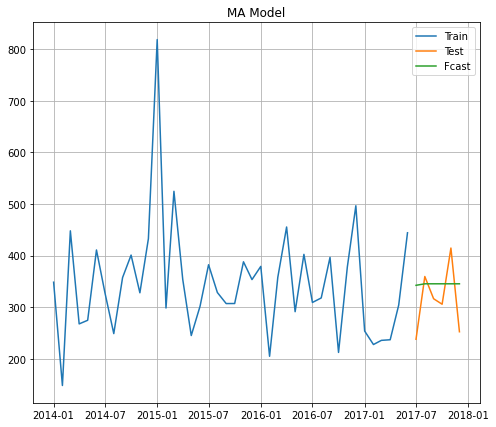

In [48]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Fcast')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [49]:
aic_m2 = ar_m2.aic
print('AIC',aic_m2)

AIC 519.8180778291622


In [50]:
mse_m2,rmse_m2,mape_m2  = test_metrics(test,fcast_m2)

In [51]:
m2_res = pd.DataFrame({'Model':'MA (0,0,1)','MSE':mse_m2,'RMSE':rmse_m2,
                       'MAPE':mape_m2,'AIC':aic_m2},index=[1])
m2_res

,Model,MSE,RMSE,MAPE,AIC
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078


In [52]:
res = pd.concat([m1_res,m2_res])
res

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078


## ARMA (1,0,1)

In [53]:
m3 = ARIMA(train,order=(1,0,1))
ar_m3 = m3.fit()
print(ar_m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -256.906
Date:                Tue, 02 Aug 2022   AIC                            521.812
Time:                        21:31:29   BIC                            528.763
Sample:                    01-01-2014   HQIC                           524.360
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.1480     21.468     16.077      0.000     303.071     387.225
ar.L1         -0.1057      4.025     -0.026      0.979      -7.994       7.783
ma.L1          0.0723      4.134      0.017      0.9

In [54]:
fcast_m3 = ar_m3.forecast(6)
fcast_m3

2017-07-01    341.760572
2017-08-01    345.506155
2017-09-01    345.110136
2017-10-01    345.152007
2017-11-01    345.147580
2017-12-01    345.148048
Freq: MS, Name: predicted_mean, dtype: float64

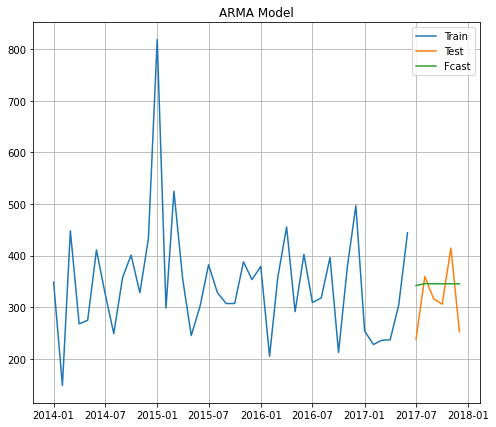

In [55]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [56]:
aic_m3 = ar_m3.aic
print('AIC',aic_m3)

AIC 521.8119894001542


In [57]:
mse_m3,rmse_m3,mape_m3  = test_metrics(test,fcast_m3)

In [58]:
m3_res = pd.DataFrame({'Model':'ARMA (1,0,1)','MSE':mse_m3,'RMSE':rmse_m3,
                       'MAPE':mape_m3,'AIC':aic_m3},index=[2])
m3_res

,Model,MSE,RMSE,MAPE,AIC
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989


In [59]:
res1 = pd.concat([res,m3_res])
res1

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989


### ARIMA (1,1,1)

In [60]:
m4 = ARIMA(train,order=(1,1,1))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.168
Date:                Tue, 02 Aug 2022   AIC                            512.335
Time:                        21:31:29   BIC                            517.476
Sample:                    01-01-2014   HQIC                           514.207
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0094      0.259     -0.036      0.971      -0.517       0.498
ma.L1         -0.9953      1.431     -0.696      0.487      -3.800       1.809
sigma2      1.239e+04   1.71e+04      0.725      0.4

In [61]:
fcast_m4 = ar_m4.forecast(6)
fcast_m4

2017-07-01    344.050542
2017-08-01    344.988726
2017-09-01    344.979929
2017-10-01    344.980012
2017-11-01    344.980011
2017-12-01    344.980011
Freq: MS, Name: predicted_mean, dtype: float64

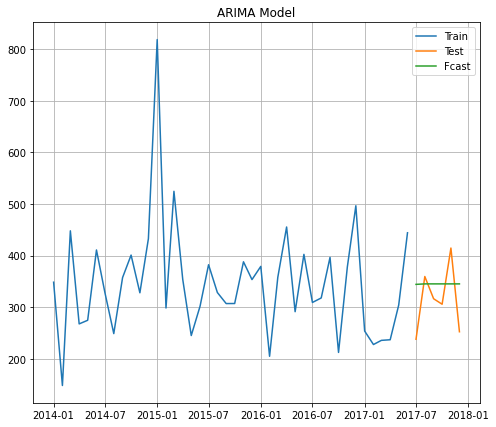

In [62]:
plt.figure(figsize=(8,7))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [63]:
aic_m4 = ar_m4.aic
print('AIC',aic_m4)

AIC 512.3354681994886


In [64]:
mse_m4,rmse_m4,mape_m4  = test_metrics(test,fcast_m4)

In [65]:
m4_res = pd.DataFrame({'Model':'ARIMA (1,1,1)','MSE':mse_m4,'RMSE':rmse_m4,
                       'MAPE':mape_m4,'AIC':aic_m4},index=[3])
m4_res

,Model,MSE,RMSE,MAPE,AIC
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468


In [66]:
res2 = pd.concat([res1,m4_res])
res2

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468


### ARIMA(2,1,2)

In [67]:
m5 = ARIMA(train,order=(2,1,2))
ar_m5 = m5.fit()
print(ar_m5.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -252.949
Date:                Tue, 02 Aug 2022   AIC                            515.897
Time:                        21:31:29   BIC                            524.465
Sample:                    01-01-2014   HQIC                           519.017
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4042      2.562      0.158      0.875      -4.618       5.426
ar.L2          0.1019      0.220      0.464      0.643      -0.329       0.532
ma.L1         -1.4114     56.415     -0.025      0.9

In [68]:
fcast_m5 = ar_m5.forecast(6)
fcast_m5

2017-07-01    332.382985
2017-08-01    349.611535
2017-09-01    345.187099
2017-10-01    345.154730
2017-11-01    344.690696
2017-12-01    344.499835
Freq: MS, Name: predicted_mean, dtype: float64

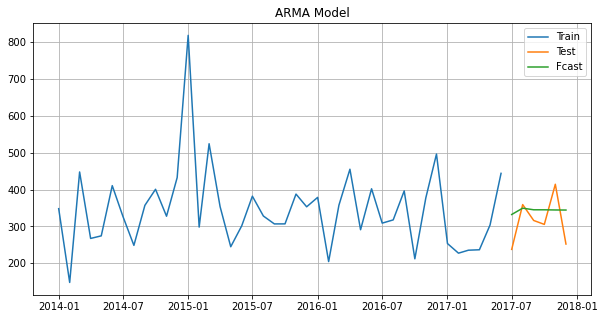

In [69]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m5,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [70]:
aic_m5 = ar_m5.aic
print('AIC',aic_m5)

mse_m5,rmse_m5,mape_m5  = test_metrics(test,fcast_m5)

AIC 515.8974686070283


In [71]:
m5_res = pd.DataFrame({'Model':'ARIMA(2,1,2)','MSE':mse_m5,'RMSE':rmse_m5,
                       'MAPE':mape_m5,'AIC':aic_m5},index=[4])
m5_res

,Model,MSE,RMSE,MAPE,AIC
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469


In [72]:
r5 = pd.concat([res2,m5_res])
r5

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469


### Creating a base arima model function for model fitting ,forecasting and graph plotting

In [73]:
def arima_model(train_data,test_data,p,d,q,fcast_val):
    model = ARIMA(train_data,order=(p,d,q))
    ar_model = model.fit()
    print(ar_model.summary())

    fcast_model = ar_model.forecast(fcast_val)
    fcast_model

    plt.figure(figsize=(10,5))
    plt.plot(train_data,label='Train')
    plt.plot(test_data,label='Test')
    plt.plot(fcast_model,label='Fcast')
#     plt.title('ARMA Model')
    plt.grid()
    plt.legend()
    plt.show()
    return ar_model,fcast_model

### ARIMA (3,1,2) Model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -252.004
Date:                Tue, 02 Aug 2022   AIC                            516.009
Time:                        21:31:29   BIC                            526.290
Sample:                    01-01-2014   HQIC                           519.753
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2590      0.882     -0.294      0.769      -1.989       1.470
ar.L2          0.0606      0.287      0.211      0.833      -0.502       0.623
ar.L3          0.2467      0.228      1.082      0.2

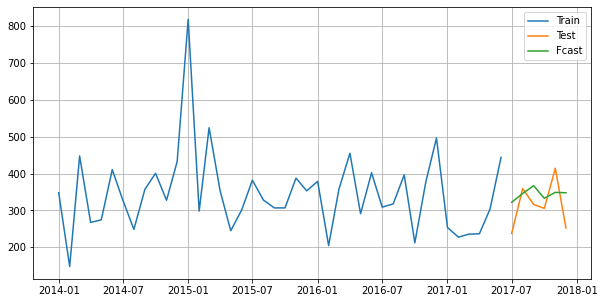

In [74]:
ar_m6,fcast_model = arima_model(train,test,p=3,d=1,q=2,fcast_val=6)

In [75]:
aic_m6 = ar_m6.aic
print('AIC',aic_m6)
mse_m6,rmse_m6,mape_m6  = test_metrics(test,fcast_model)

AIC 516.0089159942661


In [76]:
m6_res = pd.DataFrame({'Model':'ARIMA(3,1,2)','MSE':mse_m6,'RMSE':rmse_m6,
                       'MAPE':mape_m6,'AIC':aic_m6},index=[6])
m6_res

,Model,MSE,RMSE,MAPE,AIC
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916


In [77]:
r6 = pd.concat([r5,m6_res])
r6

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916


### SES

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [79]:
alpha=0.3
m7 = ExponentialSmoothing(train)
ses_m7 = m7.fit(smoothing_level=alpha)
print(ses_m7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   42
Model:             ExponentialSmoothing   SSE                         595504.943
Optimized:                         True   AIC                            405.499
Trend:                             None   BIC                            408.974
Seasonal:                          None   AICC                           406.580
Seasonal Periods:                  None   Date:                 Tue, 02 Aug 2022
Box-Cox:                          False   Time:                         21:31:29
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
initial_level              310.285

In [80]:
fcast_m7 = ses_m7.forecast(6)
fcast_m7

2017-07-01    330.064726
2017-08-01    330.064726
2017-09-01    330.064726
2017-10-01    330.064726
2017-11-01    330.064726
2017-12-01    330.064726
Freq: MS, dtype: float64

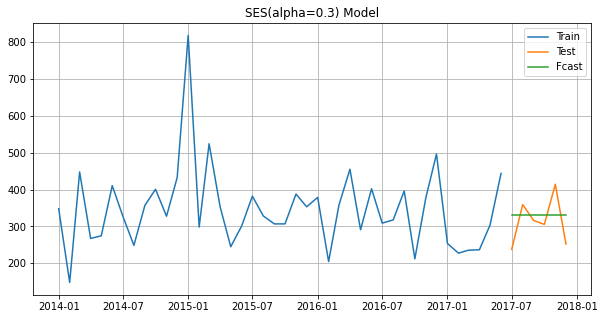

In [81]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m7,label='Fcast')
plt.title('SES(alpha=0.3) Model')
plt.grid()
plt.legend()
plt.show()

In [82]:
aic_m7 = ses_m7.aic
print('AIC',aic_m7)
mse_m7,rmse_m7,mape_m7  = test_metrics(test,fcast_m7)

AIC 405.4988046815486


In [83]:
m7_res = pd.DataFrame({'Model':'SES(alpha=0.3)','MSE':mse_m7,'RMSE':rmse_m7,
                       'MAPE':mape_m7,'AIC':aic_m7},index=[7])
m7_res

,Model,MSE,RMSE,MAPE,AIC
7,SES(alpha=0.3),3897.740375,62.431886,0.184513,405.498805


In [84]:
r7 = pd.concat([r6,m7_res])
r7

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916
7,SES(alpha=0.3),3897.740375,62.431886,0.184513,405.498805


### DES

In [85]:
alpha=0.5
beta = 0.8
m8 = ExponentialSmoothing(train)
des_m8 = m8.fit(smoothing_level=alpha,smoothing_trend=beta)
print(des_m8.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   42
Model:             ExponentialSmoothing   SSE                         672503.148
Optimized:                         True   AIC                            410.606
Trend:                             None   BIC                            414.081
Seasonal:                          None   AICC                           411.687
Seasonal Periods:                  None   Date:                 Tue, 02 Aug 2022
Box-Cox:                          False   Time:                         21:31:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
initial_level              303.810

In [86]:
fcast_m8 = des_m8.forecast(6)
fcast_m8

2017-07-01    359.868756
2017-08-01    359.868756
2017-09-01    359.868756
2017-10-01    359.868756
2017-11-01    359.868756
2017-12-01    359.868756
Freq: MS, dtype: float64

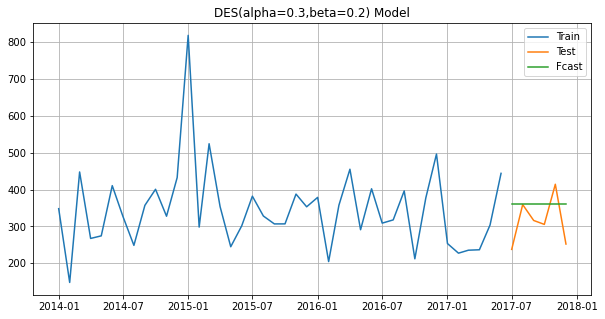

In [87]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m8,label='Fcast')
plt.title('DES(alpha=0.3,beta=0.2) Model')
plt.grid()
plt.legend()
plt.show()

In [88]:
aic_m8 = des_m8.aic
print('AIC',aic_m8)
mse_m8,rmse_m8,mape_m8  = test_metrics(test,fcast_m8)

AIC 410.60588301768905


In [89]:
m8_res = pd.DataFrame({'Model':'DES(alpha=0.5,beta=0.8)','MSE':mse_m8,'RMSE':rmse_m8,
                       'MAPE':mape_m8,'AIC':aic_m8},index=[8])
m8_res

,Model,MSE,RMSE,MAPE,AIC
8,"DES(alpha=0.5,beta=0.8)",5730.952568,75.703055,0.231821,410.605883


In [90]:
r8 = pd.concat([r7,m8_res])
r8

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916
7,SES(alpha=0.3),3897.740375,62.431886,0.184513,405.498805
8,"DES(alpha=0.5,beta=0.8)",5730.952568,75.703055,0.231821,410.605883


### TES (Holt Winter Method)

In [91]:
alpha= 0.2
beta = 0.4
gamma = 0.3
m9 = ExponentialSmoothing(train)
tes_m9 = m9.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
print(tes_m9.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   42
Model:             ExponentialSmoothing   SSE                         566065.317
Optimized:                         True   AIC                            403.369
Trend:                             None   BIC                            406.845
Seasonal:                          None   AICC                           404.450
Seasonal Periods:                  None   Date:                 Tue, 02 Aug 2022
Box-Cox:                          False   Time:                         21:31:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              322.768

In [92]:
fcast_m9 = tes_m9.forecast(6)
fcast_m9

2017-07-01    323.305721
2017-08-01    323.305721
2017-09-01    323.305721
2017-10-01    323.305721
2017-11-01    323.305721
2017-12-01    323.305721
Freq: MS, dtype: float64

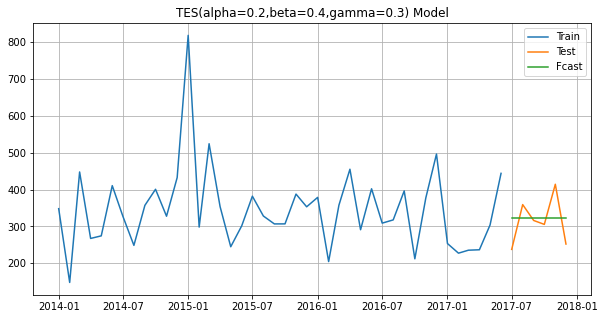

In [93]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m9,label='Fcast')
plt.title('TES(alpha=0.2,beta=0.4,gamma=0.3) Model')
plt.grid()
plt.legend()
plt.show()

In [94]:
aic_m9 = tes_m9.aic
print('AIC',aic_m9)
mse_m9,rmse_m9,mape_m9  = test_metrics(test,fcast_m9)

m9_res = pd.DataFrame({'Model':'TES(alpha=0.2,beta=0.4,gamma=0.3)','MSE':mse_m9,'RMSE':rmse_m9,
                       'MAPE':mape_m9,'AIC':aic_m9},index=[9])
m9_res

AIC 403.3693956006382


,Model,MSE,RMSE,MAPE,AIC
9,"TES(alpha=0.2,beta=0.4,gamma=0.3)",3729.131348,61.066614,0.173908,403.369396


In [95]:
r9 = pd.concat([r8,m9_res])
r9

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916
7,SES(alpha=0.3),3897.740375,62.431886,0.184513,405.498805
8,"DES(alpha=0.5,beta=0.8)",5730.952568,75.703055,0.231821,410.605883
9,"TES(alpha=0.2,beta=0.4,gamma=0.3)",3729.131348,61.066614,0.173908,403.369396


### pmdarima

In [96]:
import pmdarima as pm

In [97]:
m10 = pm.auto_arima(train,start_p=0,start_q=0,
              test='adf',
              d=None,                     # use adftest to find optimal 'd'        
              max_p=3,max_q=3,max_d=1,
              start_P=0,start_Q=0,
              D=0,                       # enforcing D=0
              max_P=3,max_Q=3,
              seasonal=True,
              trace=True,
              suppress_warnings=True, 
              stepwise=True)  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=535.950, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=524.214, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=533.959, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=517.569, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=519.517, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=515.596, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=522.259, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=517.542, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best mode

In [98]:
fcast_m10 = m10.predict(6)
fcast_m10

array([304.65650364, 349.00304964, 378.11363943, 335.321672  ,
       355.27039281, 359.28139978])

In [99]:
fcast_m10_res = pd.DataFrame({'Date':test.index,'Pred_price':fcast_m10})
fcast_m10_res.set_index('Date',inplace=True)
fcast_m10_res.head()

,Pred_price
Date,
2017-07-01,304.656504
2017-08-01,349.003050
2017-09-01,378.113639
2017-10-01,335.321672
2017-11-01,355.270393


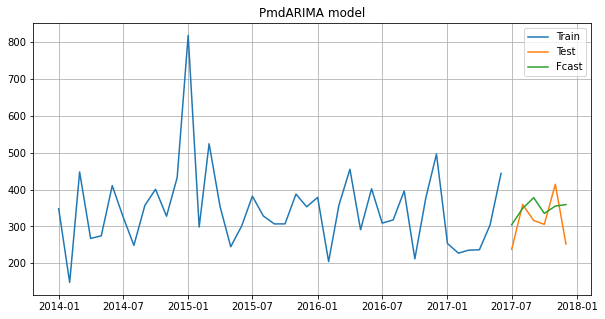

In [100]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m10_res,label='Fcast')
plt.title('PmdARIMA model')
plt.grid()
plt.legend()
plt.show()

In [101]:
aic_m10 = m10.aic()
print('AIC',aic_m10)
mse_m10,rmse_m10,mape_m10  = test_metrics(test,fcast_m10)

AIC 515.5958811510129


In [102]:
m10_res = pd.DataFrame({'Model':'PmdARIMA','MSE':mse_m10,'RMSE':rmse_m10,
                       'MAPE':mape_m10,'AIC':aic_m10},index=[10])
m10_res

,Model,MSE,RMSE,MAPE,AIC
10,PmdARIMA,4050.567896,63.644072,0.195281,515.595881


In [103]:
r10 = pd.concat([r9,m10_res])
r10

,Model,MSE,RMSE,MAPE,AIC
0,"AR (1,0,0)",4489.938428,67.007003,0.205884,519.815107
1,"MA (0,0,1)",4500.031165,67.082272,0.206128,519.818078
2,"ARMA (1,0,1)",4482.026214,66.947937,0.205618,521.811989
3,"ARIMA (1,1,1)",4559.941963,67.527342,0.207258,512.335468
4,"ARIMA(2,1,2)",4146.567253,64.393845,0.196934,515.897469
6,"ARIMA(3,1,2)",4020.083188,63.404126,0.196824,516.008916
7,SES(alpha=0.3),3897.740375,62.431886,0.184513,405.498805
8,"DES(alpha=0.5,beta=0.8)",5730.952568,75.703055,0.231821,410.605883
9,"TES(alpha=0.2,beta=0.4,gamma=0.3)",3729.131348,61.066614,0.173908,403.369396
10,PmdARIMA,4050.567896,63.644072,0.195281,515.595881


### Inference
<b>1) Based on RMSE or MSE </b>

a) TES(alpha=0.2,beta=0.4,gamma=0.3) is the most appropriate model(best considering other models)<br>
b) SES(alpha=0.3) can also be considered good to go with.

<b>2) Based on AIC</b>

a) TES(alpha=0.2,beta=0.4,gamma=0.3) is the most appropriate model(best considering others).